In [2]:
### Import des librairies utiles
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chargement du fichier dans un dataframe / On limite à 1000 pour developper
df = pd.read_csv("AllMoviesDetailsCleaned.csv", encoding='utf-8-sig', sep=";", 
                 engine="python",parse_dates=["release_date"])

# On remplit les vides avec 0 & on force le runtime en integer
df = df.fillna("0")
df['runtime'] = df['runtime'].astype(int)

# On garde les lignes non-vides
#df = df[df["adult"!=34]]
#df.count()
        
# On peut afficher les types des colonnes pour vérifier avec df.dtypes()
df.dtypes

id                                      int64
budget                                  int64
genres                                 object
imdb_id                                object
original_language                      object
original_title                         object
overview                               object
popularity                             object
production_companies                   object
production_countries                   object
release_date                   datetime64[ns]
revenue                                 int64
runtime                                 int32
spoken_languages                       object
status                                 object
tagline                                object
title                                  object
vote_average                          float64
vote_count                              int64
production_companies_number             int64
production_countries_number             int64
spoken_languages_number           

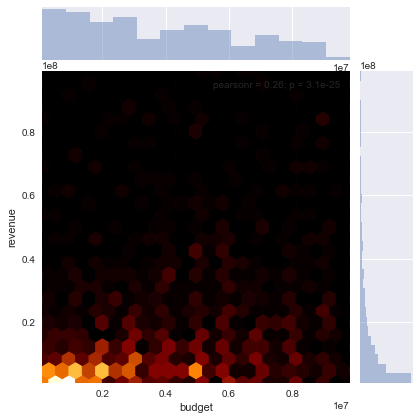

In [49]:
#y a t'il une corrélation entre budget & revenu ?
import seaborn as sns
df2 = df[np.logical_and(np.logical_and(df["budget"]>100000,df["budget"]<10000000), 
                        np.logical_and(df["revenue"]<100000000,df["revenue"]>1000000))].loc[:,{"budget","revenue"}]
plt.gcf().clear()
sns.jointplot(x='budget',y='revenue',data=df2,kind='hex', cmap= 'afmhot', size=6)
plt.show()

# Evolution des caractéristiques des films par année
durée moyenne, nombre de votes, vote moyen, nb de films

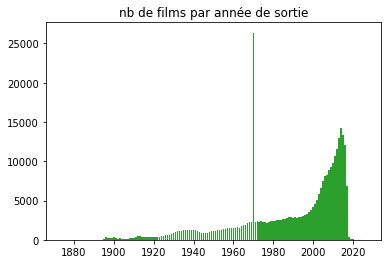

In [102]:
# On crée une série avec l'année extraite (utilisation des fonctions map & lambda)
serie = df["release_date"].map(lambda x:x.year)

# tout d'abord nb de films par ans
nb_films_an = df["id"].groupby(pd.Index(serie)).count()

# On affiche la serie
plt.bar(nb_films_an.index,nb_films_an)
plt.title("nb de films par année de sortie")
plt.show()

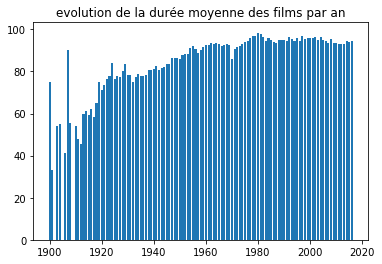

In [30]:
# puis la moyenne des durées des films >30 min et <300 min
duree_min = df["runtime"]>30
duree_max = df["runtime"]<300

# On crée une série avec l'année extraite (utilisation des fonctions map & lambda)
df2 = df[duree_min & duree_max].loc[:,["release_date","runtime"]]
serie = df2["release_date"].map(lambda x:x.year)

film_runtime = df2["runtime"].groupby(pd.Index(serie)).mean()

# On affiche la serie (on vire 1970 qui est l'année avec les dates par défaut, puis on ne garde que 1900=>2016)
film_runtime = film_runtime.loc[1900:2016].drop(1970)
plt.bar(film_runtime.index,film_runtime)
plt.title("evolution de la durée moyenne des films par an")
plt.show()

In [87]:
# quels sont les langues les plus représentées ? => EN, probablement un peu surestimé car tmdb est une base anglaise
test = df.groupby("original_language").count()
test.sort_values("id", ascending = False)

,id,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
original_language,,,,,,,,,,,,,,,,,,,,,
en,216831,216831,216831,216831,216831,216831,216831,216831,216831,216831,...,216831,216831,216831,216831,216831,216831,216831,216831,216831,216831
de,20465,20465,20465,20465,20465,20465,20465,20465,20465,20465,...,20465,20465,20465,20465,20465,20465,20465,20465,20465,20465
fr,14734,14734,14734,14734,14734,14734,14734,14734,14734,14734,...,14734,14734,14734,14734,14734,14734,14734,14734,14734,14734
es,12004,12004,12004,12004,12004,12004,12004,12004,12004,12004,...,12004,12004,12004,12004,12004,12004,12004,12004,12004,12004
ja,8393,8393,8393,8393,8393,8393,8393,8393,8393,8393,...,8393,8393,8393,8393,8393,8393,8393,8393,8393,8393
it,7749,7749,7749,7749,7749,7749,7749,7749,7749,7749,...,7749,7749,7749,7749,7749,7749,7749,7749,7749,7749
pt,6847,6847,6847,6847,6847,6847,6847,6847,6847,6847,...,6847,6847,6847,6847,6847,6847,6847,6847,6847,6847
ru,5395,5395,5395,5395,5395,5395,5395,5395,5395,5395,...,5395,5395,5395,5395,5395,5395,5395,5395,5395,5395
nl,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,...,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114


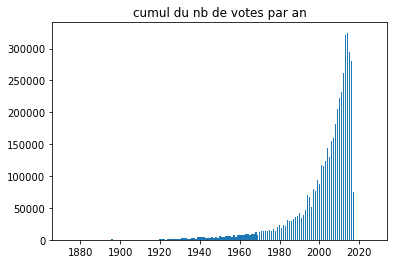

In [44]:
# On crée une série avec l'année extraite (utilisation des fonctions map & lambda)
serie = df["release_date"].map(lambda x:x.year)

# cumul du nombre de votes
cumul_vote = df["vote_count"].groupby(pd.Index(serie)).sum()

# On affiche la serie
plt.bar(cumul_vote.index,cumul_vote)
plt.title("cumul du nb de votes par an")
plt.show()

# Conclusion : les gens se prononcent très peu sur les vieux films (ils ne les regardent probablement pas)

# Evolution du nb de westerns par an (en % du nb de films)

C:\Users\rapno\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


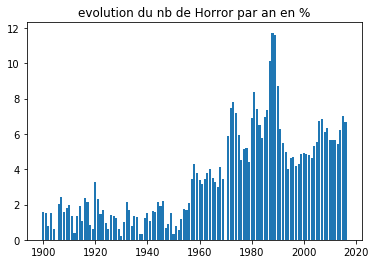

In [109]:
genre_film="Horror"

# df1 : tous les films
# df2 : les films de ce genre
serie2 = df["genres"].str.contains(genre_film)
df2 = df[serie2]

index_year1 = df["release_date"].map(lambda x:x.year)
index_year2 = df2["release_date"].map(lambda x:x.year)

nb_genre_an = df2[serie2].groupby(pd.Index(index_year2)).count()
total_films_an = df["id"].groupby(pd.Index(index_year1)).count()

# On calcule la part relative des films de ce genre
for year in nb_genre_an.index:
    nb_genre_an.loc[year,"id"] = nb_genre_an.loc[year,"id"]*100/total_films_an.loc[year]

# On affiche la serie (on vire 1970 qui est l'année avec les dates par défaut, puis on ne garde que 1900=>2016)
nb_genre_an = nb_genre_an.loc[1900:2016].drop(1970)
plt.bar(nb_genre_an.index,nb_genre_an["id"])
plt.title("evolution du nb de " + genre_film + " par an en %")
plt.show()

NameError: name 'df' is not defined